In [3]:
pip install requests beautifulsoup4

Note: you may need to restart the kernel to use updated packages.


In [12]:
#-*- coding:utf-8 -*-
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import os
import datetime as dt

In [13]:
#주식 코드 딕셔너리
stock_code = {'삼성전자' : '005930', '카카오' : '035720', '신풍제약' : '019170', '네이버' : '035420'}

#현재 주가 
def now_price(code):
    #html을 긁어와서 네이버 주식 사이트의 bsobject만들기
    url_1 = "https://finance.naver.com/item/main.nhn?code=" + code
    reseponse = requests.get(url_1)
    bsobject = BeautifulSoup(reseponse.content, "html.parser")
    
    #현재 주가를 알려주는 코드 찾아서 text 가져오기
    no_today = bsobject.find("p", {"class" : "no_today"})
    blind = no_today.find("span", {"class" : "blind"})
    now_price = blind.text
    
    #가격 출력
    print(now_price, end = ' ')

    
for i in stock_code:
    print(i, end=' ')
    now_price(stock_code[i])
    print("\n")

삼성전자 53,800 

카카오 343,000 

신풍제약 62,500 

네이버 287,000 



Samsung
2020.03.04   57,400   24,765,728
2020.03.03   55,400   30,330,295
2020.03.02   55,000   30,403,412
2020.02.28   54,200   30,054,227
2020.02.27   55,900   23,209,541
2020.02.26   56,500   25,483,102
2020.02.25   57,900   23,885,408
2020.02.24   56,800   25,627,537
2020.02.21   59,200   13,777,393
2020.02.20   60,000   14,591,924
2020.03.04   57,400   24,765,728
2020.03.03   55,400   30,330,295
2020.03.02   55,000   30,403,412
2020.02.28   54,200   30,054,227
2020.02.27   55,900   23,209,541
2020.02.26   56,500   25,483,102
2020.02.25   57,900   23,885,408
2020.02.24   56,800   25,627,537
2020.02.21   59,200   13,777,393
2020.02.20   60,000   14,591,924
2020.03.04   57,400   24,765,728
2020.03.03   55,400   30,330,295
2020.03.02   55,000   30,403,412
2020.02.28   54,200   30,054,227
2020.02.27   55,900   23,209,541
2020.02.26   56,500   25,483,102
2020.02.25   57,900   23,885,408
2020.02.24   56,800   25,627,537
2020.02.21   59,200   13,777,393
2020.02.20   60,000   14,591,924
20

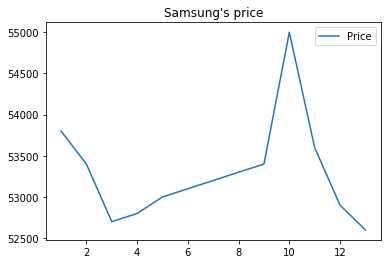

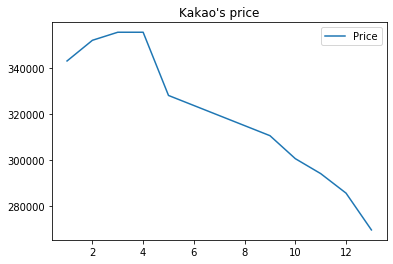

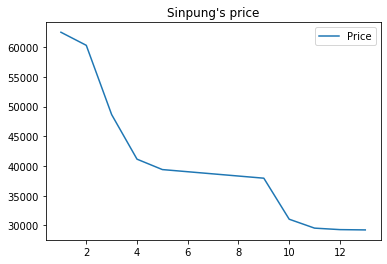

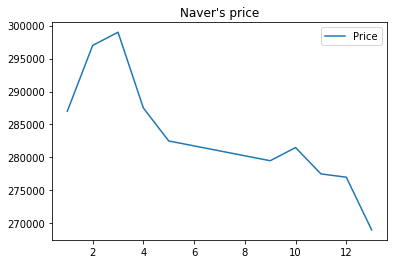

In [16]:
#삼성전자 '005930'
#카카오 '035720'
#신풍제약 '019170'
#네이버 '035420'

#주식 코드 딕셔너리
stock_code = {'Samsung' : '005930', 'Kakao' : '035720', 'Sinpung' : '019170', 'Naver' : '035420'}

#데이터 프레임 만들기
df = pd.DataFrame()

#일별 시세를 알려주는 함수
def days_price(code, pages):
    #날짜/종가/거래량 저장할 result 리스트
    result = [[], [], []] 
    #여러 pages의 정보를 긁어오는 반복문
    for n in range(1, pages):
        #일별 시세표가 있는 url
        url_2 = 'https://finance.naver.com/item/sise_day.nhn?code='+code+'&page='+ str(pages)
        response = requests.get(url_2)
        html = response.content
        soup = BeautifulSoup(html, 'html.parser')
        tr = soup.select('table > tr')
        
        #일별 시세표 중 날짜[0]/종가[1]/거래량[6] result 리스트에 추가
        for i in range(1, len(tr)-1):
            if tr[i].select('td')[0].text.strip():
                result[0].append(tr[i].select('td')[0].text.strip())
                result[1].append(tr[i].select('td')[1].text.strip())
                result[2].append(tr[i].select('td')[6].text.strip())
    
    #result를 출력하는 함수
    for i in range(len(result[0])):
        print(result[0][i], ' ', result[1][i], ' ', result[2][i])
        
#주식 코드마다 일별 시세표를 출력
for i in stock_code:
    print(i)
    days_price(stock_code[i], 10)
    print("\n")

    
#크롤링한 데이터들을 df화시키고 시각화하고, 그 결과를 저장.
for i in stock_code:
    print(i)
    url_3 = 'https://finance.naver.com/item/sise_day.nhn?code='+stock_code[i]+'&page=1'
    df = pd.read_html(url_3,header = 0)[0]
    print(df)
    df = df.dropna()
    df2 = pd.DataFrame()
    df2['Date'] = df['날짜']
    df2['Price'] = df['종가']
    df2.plot()
    plt.title(i + '\'s price')
    df.to_csv("stock.csv", mode='a')
    

#아쉬운 점 : X축에 날짜표시 못함, 크롤링해서 뽑아온 result를 통해서 df를 만들지 못함
#시각화에 한글 출력 못함, 아직 pandas나 BeautifulSoup에 익숙해지지 못함. 원리 파악 부족
#한글 깨짐